<a href="https://colab.research.google.com/github/PranavSingh31/Cat-vs-Dog-Classifier/blob/main/DagvsCatClassificationUsingDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!chmod 600 /content/kaggle.json

Importing dogs-vs-cat.zip from Kaggle using Kaggle API

In [4]:
!kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:08<00:00, 40.7MB/s]
100% 812M/812M [00:08<00:00, 100MB/s] 


In [5]:
#extracting the compressed dataset file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset) as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [6]:
#extracting the compressed dataset file
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset) as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [7]:
#extracting the compressed dataset file
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset) as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [8]:
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files);
print('Number of images: ', file_count)

Number of images:  25000


In [9]:
#counting the number of files in test1 folder
path, dirs, files = next(os.walk('/content/test1'))
file_count = len(files);
print('Number of images: ', file_count)

Number of images:  12500


In [10]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print('Number of cats : ',cat_count)
print('Number of dogs : ',dog_count)

Number of cats :  12500
Number of dogs :  12500


Printing the name of images

In [11]:
train_file_names = os.listdir('/content/train/')
print(train_file_names)

['dog.9995.jpg', 'cat.1135.jpg', 'dog.7747.jpg', 'dog.6027.jpg', 'dog.10506.jpg', 'cat.959.jpg', 'dog.4635.jpg', 'cat.11587.jpg', 'cat.7724.jpg', 'dog.3852.jpg', 'dog.4426.jpg', 'cat.10915.jpg', 'cat.9010.jpg', 'dog.11416.jpg', 'cat.10701.jpg', 'dog.271.jpg', 'dog.6946.jpg', 'cat.2434.jpg', 'cat.1828.jpg', 'dog.9352.jpg', 'cat.6915.jpg', 'cat.5158.jpg', 'cat.3119.jpg', 'cat.2043.jpg', 'dog.8577.jpg', 'dog.6261.jpg', 'cat.1059.jpg', 'dog.5195.jpg', 'dog.7474.jpg', 'dog.6682.jpg', 'cat.9561.jpg', 'cat.6162.jpg', 'cat.917.jpg', 'dog.2018.jpg', 'cat.2661.jpg', 'dog.11997.jpg', 'cat.6282.jpg', 'dog.10177.jpg', 'dog.10582.jpg', 'dog.5467.jpg', 'dog.7433.jpg', 'dog.5381.jpg', 'cat.5780.jpg', 'dog.7739.jpg', 'dog.8632.jpg', 'dog.9409.jpg', 'dog.12498.jpg', 'cat.481.jpg', 'cat.6995.jpg', 'dog.9550.jpg', 'dog.7263.jpg', 'cat.11781.jpg', 'dog.11863.jpg', 'cat.3966.jpg', 'cat.8575.jpg', 'cat.6618.jpg', 'dog.9919.jpg', 'dog.4267.jpg', 'cat.5797.jpg', 'dog.11842.jpg', 'dog.4372.jpg', 'cat.8650.jpg',

In [23]:
test_file_names = os.listdir('/content/test1/')
print(test_file_names)

['6771.jpg', '1017.jpg', '12313.jpg', '5669.jpg', '8622.jpg', '10848.jpg', '8114.jpg', '4296.jpg', '7907.jpg', '3841.jpg', '10321.jpg', '3491.jpg', '1329.jpg', '11329.jpg', '6035.jpg', '2785.jpg', '6594.jpg', '4897.jpg', '4132.jpg', '7563.jpg', '12266.jpg', '12046.jpg', '9950.jpg', '11568.jpg', '5299.jpg', '7384.jpg', '2586.jpg', '11652.jpg', '4059.jpg', '5324.jpg', '10218.jpg', '11920.jpg', '7503.jpg', '3508.jpg', '944.jpg', '1435.jpg', '7057.jpg', '5425.jpg', '8741.jpg', '1827.jpg', '11528.jpg', '2228.jpg', '10374.jpg', '5930.jpg', '9645.jpg', '6900.jpg', '3266.jpg', '1534.jpg', '446.jpg', '2765.jpg', '7358.jpg', '505.jpg', '2995.jpg', '7486.jpg', '9874.jpg', '5340.jpg', '7595.jpg', '9482.jpg', '5459.jpg', '751.jpg', '11392.jpg', '8709.jpg', '716.jpg', '5694.jpg', '790.jpg', '11381.jpg', '351.jpg', '977.jpg', '8376.jpg', '6946.jpg', '11422.jpg', '11946.jpg', '9070.jpg', '11455.jpg', '10906.jpg', '2512.jpg', '10625.jpg', '2354.jpg', '6403.jpg', '1648.jpg', '11564.jpg', '6977.jpg', '11

Importing the dependencies

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow #to display image in a window

Displaying the images of dogs and cats

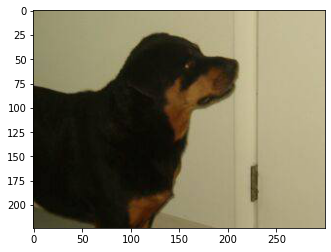

In [24]:
#displa dog image
img  = mpimg.imread('/content/train/dog.9995.jpg')
plt.imshow(img)

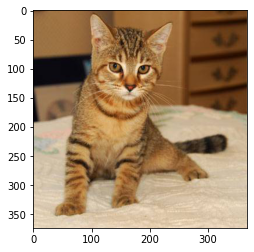

In [25]:
#display cat image
img  = mpimg.imread('/content/train/cat.1135.jpg')
plt.imshow(img)

Resizing all the images

In [26]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

FileExistsError: ignored

In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_img_path = resized_folder + filename
  img.save(new_img_path)

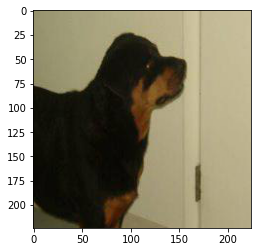

In [27]:
#display resized dog image
img  = mpimg.imread('/content/image_resized/dog.9995.jpg')
plt.imshow(img)

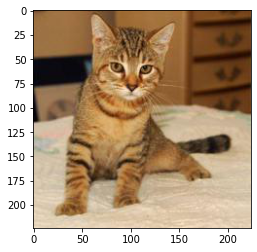

In [28]:
#display resized cat image
img  = mpimg.imread('/content/image_resized/cat.1135.jpg')
plt.imshow(img)

**Creating labels for resized images of dogs and cat**

0 for cat and 1 for dog

In [29]:
filenames = os.listdir('/content/image_resized')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label =='dog':
    labels.append(1)
  else:
    labels.append(0)

print(labels)

[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 

In [30]:
print(filenames[0:5])
print(labels[0:5])
print(len(filenames));
print(len(labels));

['dog.9995.jpg', 'cat.1135.jpg', 'dog.7747.jpg', 'dog.6027.jpg', 'dog.10506.jpg']
[1, 0, 1, 1, 1]
2000
2000


In [31]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 974 1026]


**Converting all the resized images to numpy arrays**

In [32]:
import cv2
import glob

In [33]:
image_directory = '/content/image_resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
print(dog_cat_images)

[[[[105 142 146]
   [107 144 148]
   [108 145 149]
   ...
   [155 190 200]
   [155 190 200]
   [155 190 200]]

  [[105 142 146]
   [107 144 148]
   [108 145 149]
   ...
   [155 190 200]
   [155 190 200]
   [155 190 200]]

  [[105 142 146]
   [107 144 148]
   [108 145 149]
   ...
   [155 190 200]
   [155 190 200]
   [155 190 200]]

  ...

  [[ 49  70  72]
   [ 49  70  72]
   [ 49  70  72]
   ...
   [135 170 180]
   [135 170 180]
   [135 170 180]]

  [[ 49  70  72]
   [ 49  70  72]
   [ 49  70  72]
   ...
   [135 170 180]
   [135 170 180]
   [135 170 180]]

  [[ 49  70  72]
   [ 49  70  72]
   [ 49  70  72]
   ...
   [135 170 180]
   [135 170 180]
   [135 170 180]]]


 [[[ 47  72 114]
   [ 45  70 112]
   [ 41  69 110]
   ...
   [ 33  69 117]
   [ 34  72 120]
   [ 40  78 126]]

  [[ 56  81 123]
   [ 51  79 120]
   [ 49  77 118]
   ...
   [ 26  64 112]
   [ 29  66 116]
   [ 33  73 121]]

  [[ 65  93 134]
   [ 61  91 132]
   [ 58  88 129]
   ...
   [ 24  64 113]
   [ 27  66 118]
   [ 32  73

In [35]:
type(dog_cat_images)

numpy.ndarray

In [36]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [37]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [40]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train_scaled)
print(X_test_scaled)

[[[[0.36078431 0.32156863 0.36862745]
   [0.36862745 0.32941176 0.37647059]
   [0.37647059 0.3372549  0.38431373]
   ...
   [0.43921569 0.39607843 0.42745098]
   [0.42745098 0.39215686 0.43137255]
   [0.42745098 0.39215686 0.43137255]]

  [[0.36078431 0.32156863 0.36862745]
   [0.36862745 0.32941176 0.37647059]
   [0.37647059 0.3372549  0.38431373]
   ...
   [0.43529412 0.39215686 0.42352941]
   [0.42352941 0.38823529 0.42745098]
   [0.41960784 0.38431373 0.42352941]]

  [[0.36470588 0.3254902  0.37254902]
   [0.36862745 0.32941176 0.37647059]
   [0.37647059 0.3372549  0.38431373]
   ...
   [0.42352941 0.39215686 0.41960784]
   [0.41568627 0.38039216 0.41960784]
   [0.41176471 0.37647059 0.41568627]]

  ...

  [[0.65098039 0.63529412 0.65882353]
   [0.63921569 0.62352941 0.64705882]
   [0.63921569 0.62352941 0.64705882]
   ...
   [0.65490196 0.64705882 0.67058824]
   [0.65098039 0.64313725 0.66666667]
   [0.65098039 0.64313725 0.66666667]]

  [[0.60784314 0.59215686 0.61568627]
   [0.5

**Building the Neural Network**

In [41]:
import tensorflow as tf
import tensorflow_hub as hub

In [42]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [43]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [44]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [45]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 47s 863ms/step - loss: 0.1709 - acc: 0.9369
Epoch 2/5
50/50 [==============================] - 44s 870ms/step - loss: 0.0591 - acc: 0.9812
Epoch 3/5
50/50 [==============================] - 43s 868ms/step - loss: 0.0401 - acc: 0.9887
Epoch 4/5
50/50 [==============================] - 43s 857ms/step - loss: 0.0312 - acc: 0.9931
Epoch 5/5
50/50 [==============================] - 45s 895ms/step - loss: 0.0256 - acc: 0.9969


In [46]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accurary =', acc)

13/13 [==============================] - 11s 818ms/step - loss: 0.0528 - acc: 0.9775
Test Loss = 0.05276639014482498
Test Accurary = 0.9775000214576721


**Predictive System**

Path of the image to be predicted: /content/image_2022-12-21_114714563.png


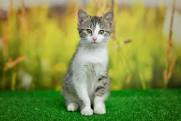

1/1 [==============================] - 1s 519ms/step
[[ 4.260141 -5.163048]]
0
Image is a cat


In [47]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
  print('Image is a cat')
else:
  print(('Image is a dog'))